In [3]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext pycodestyle_magic

In [4]:
A = np.array([[3, 2], [2, 6]])
b = np.array([2, -8])

In [5]:
def f(x, y):
    vec_x = np.array([x, y])
    return np.einsum('i...,ij,j...', vec_x, A, vec_x) / 2 - np.einsum('i...,i', vec_x, b)

In [6]:
x_min = np.linalg.solve(A, b)
print(x_min)

[ 2. -2.]


In [7]:
def gradient_descent(x0, num_steps=10):
    xs = np.zeros((num_steps, *x0.shape))
    xs[0] = x0

    for i in range(1, num_steps):
        # Residual
        r = b - A @ xs[i-1, :]

        # Step size
        eta = r @ r / (r.T @ A @ r)

        # Update position
        xs[i] = xs[i-1, :] + eta * r
        if np.linalg.norm(xs[i] - x_min) < 0.001:
            xs[i:] = xs[i]
            break

    return xs

In [8]:
def plot(xs):
    fig = plt.figure()
    ax = plt.axes()
    plt.axes().set_aspect('equal', 'datalim')

    x = np.linspace(-6, 6, 30)
    y = np.linspace(-4, 4, 30)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    ax.contour(X, Y, Z)
    ax.plot(xs[:, 0], xs[:, 1], marker="o", markersize=2, color="orange")

    plt.show()
    fig.savefig('gradient_descent.png', dpi=300)

xs [[-2.         -2.        ]
 [ 0.08       -0.61333333]
 [ 1.00444444 -2.        ]
 [ 1.52213333 -1.65487407]
 [ 1.75221728 -2.        ]
 [ 1.8810643  -1.91410199]
 [ 1.93832964 -2.        ]
 [ 1.97039822 -1.97862094]
 [ 1.98465093 -2.        ]
 [ 1.99263245 -1.99467899]]


/home/marsll/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


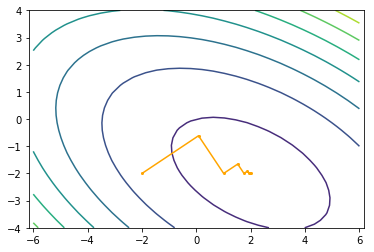

In [10]:
x0 = np.array([-2, -2])
num_steps = 10
xs = gradient_descent(x0, num_steps)
print("xs", xs)
plot(xs)